In [1]:
# Step 0. Load libraries and custom modules
# Basic input/output
import pickle
# Matrices and dataframes
import numpy as np
import pandas as pd
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Maths and Stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# Machine Learning
from sklearn.linear_model import LinearRegression
# Metrics
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Step 1. Load data and prepare

#    (a) Original owners of database:
# 	Marine Resources Division
# 	Marine Research Laboratories - Taroona
# 	Department of Primary Industry and Fisheries, Tasmania
# 	GPO Box 619F, Hobart, Tasmania 7001, Australia
# 	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)

#    (b) Donor of database:
# 	Sam Waugh (Sam.Waugh@cs.utas.edu.au)
# 	Department of Computer Science, University of Tasmania
# 	GPO Box 252C, Hobart, Tasmania 7001, Australia

#    (c) Date received: December 1995

# Relevant Information Paragraph:

#    Predicting the age of abalone from physical measurements.  
#    The age of abalone is determined by cutting the shell through the 
#    cone, staining it, and counting the number of rings through a 
#    microscope -- a boring and time-consuming task.  Other 
#    measurements, which are easier to obtain, are used to predict the 
#    age.  Further information, such as weather patterns and location 
#    (hence food availability) may be required to solve the problem.

#    From the original data examples with missing values were removed 
#    (the majority having the predicted value missing), and the ranges 
#    of the continuous values have been scaled for use with an ANN 
#    (by dividing by 200).

#    Data comes from an original (non-machine-learning) study:

# 	Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn 
#   and Wes B Ford (1994) "The Population Biology of Abalone 
#   (_Haliotis_species) in Tasmania. I. Blacklip Abalone (_H. rubra_) 
#   from the North Coast and Islands of Bass Strait", Sea Fisheries 
#   Division, Technical Report No. 48 (ISSN 1034-3288)

#  Attribute information:

#    Given is the attribute name, attribute type, the measurement unit 
#    and a brief description.  The number of rings is the value to 
#    predict: either as a continuous value or as a classification 
#    problem.

# 	Name		    Data Type	Meas.	Description
# 	----		    ---------	-----	-----------
# 	Sex		        nominal			    M, F, and I (infant)
# 	Length		    continuous	mm	    Longest shell measurement
# 	Diameter	    continuous	mm	    perpendicular to length
# 	Height		    continuous	mm	    with meat in shell
# 	Whole weight	continuous	grams	whole abalone
# 	Shucked weight	continuous	grams	weight of meat
# 	Viscera weight	continuous	grams	gut weight (after bleeding)
# 	Shell weight	continuous	grams	after being dried
# 	Rings		    integer			    +1.5 gives the age in years

url = 'https://archive.ics.uci.edu/ml/' + \
    'machine-learning-databases/abalone/abalone.data'
df_raw = pd.read_csv(url, header=None)
df_raw.columns = ['sex','length_mm','diameter_mm','height_mm',
    'whole_weight_gr','shucked_weight_gr','viscera_weight_gr',
    'shell_weight_gr','rings']

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                4177 non-null   object 
 1   length_mm          4177 non-null   float64
 2   diameter_mm        4177 non-null   float64
 3   height_mm          4177 non-null   float64
 4   whole_weight_gr    4177 non-null   float64
 5   shucked_weight_gr  4177 non-null   float64
 6   viscera_weight_gr  4177 non-null   float64
 7   shell_weight_gr    4177 non-null   float64
 8   rings              4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df_raw.sample(10)

sex  length_mm  diameter_mm  height_mm  whole_weight_gr  \
994    F      0.580        0.450      0.145           1.1370   
1009   F      0.615        0.480      0.160           1.2525   
1560   I      0.435        0.325      0.110           0.3670   
3440   I      0.465        0.370      0.100           0.5055   
2751   F      0.515        0.395      0.135           0.5160   
949    M      0.480        0.375      0.115           0.6765   
2058   M      0.485        0.390      0.135           0.6170   
3356   I      0.390        0.300      0.100           0.3085   
849    M      0.550        0.450      0.150           1.0145   
3849   M      0.385        0.300      0.115           0.3435   

      shucked_weight_gr  viscera_weight_gr  shell_weight_gr  rings  
994              0.5585             0.2200           0.2900      8  
1009             0.5850             0.2595           0.3300      8  
1560             0.1595             0.0800           0.1050      6  
3440             0.2340             0.1100           0.1400      7  
2751             0.2015             0.1320           0.1620      9  
949              0.3205             0.1065           0.1700      6  
2058             0.2500             0.1345           0.1635      8  
3356             0.1385             0.0735           0.0850      6  
849              0.4070             0.2015           0.2875     10  
3849             0.1645             0.0850           0.1025      6

In [5]:
df_interim = df_raw.copy()
df_interim['sex'] = df_interim['sex'].astype('category')
df_interim['age'] = df_interim['rings'] + 1.5

In [6]:
df = df_interim.copy()

In [7]:
X = df.drop(['rings','age'], axis=1)
y = df[['age']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
df_train = pd.concat([X_train,y_train], axis=1)

In [8]:
df_train.describe().T

count       mean       std     min     25%       50%  \
length_mm          3132.0   0.524729  0.119612  0.0750  0.4500   0.54500   
diameter_mm        3132.0   0.408410  0.098746  0.0550  0.3500   0.42500   
height_mm          3132.0   0.139799  0.042385  0.0000  0.1150   0.14500   
whole_weight_gr    3132.0   0.829697  0.488028  0.0020  0.4475   0.80000   
shucked_weight_gr  3132.0   0.359679  0.221254  0.0010  0.1880   0.33625   
viscera_weight_gr  3132.0   0.181121  0.109618  0.0005  0.0950   0.17100   
shell_weight_gr    3132.0   0.239315  0.138384  0.0015  0.1300   0.23500   
age                3132.0  11.448276  3.257677  2.5000  9.5000  10.50000   

                         75%      max  
length_mm           0.615000   0.8000  
diameter_mm         0.480000   0.6300  
height_mm           0.165000   1.1300  
whole_weight_gr     1.153000   2.7795  
shucked_weight_gr   0.502000   1.4880  
viscera_weight_gr   0.252500   0.7600  
shell_weight_gr     0.325625   1.0050  
age                12.500000  30.5000

In [9]:
df_train.describe(include='category')

sex
count   3132
unique     3
top        M
freq    1131

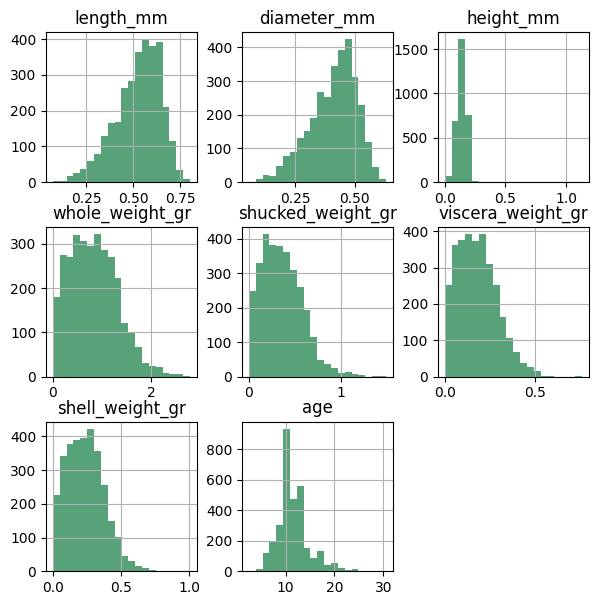

In [10]:
df_train.hist(figsize=(7,7), color='seagreen', alpha=0.8, bins=20)
plt.show()

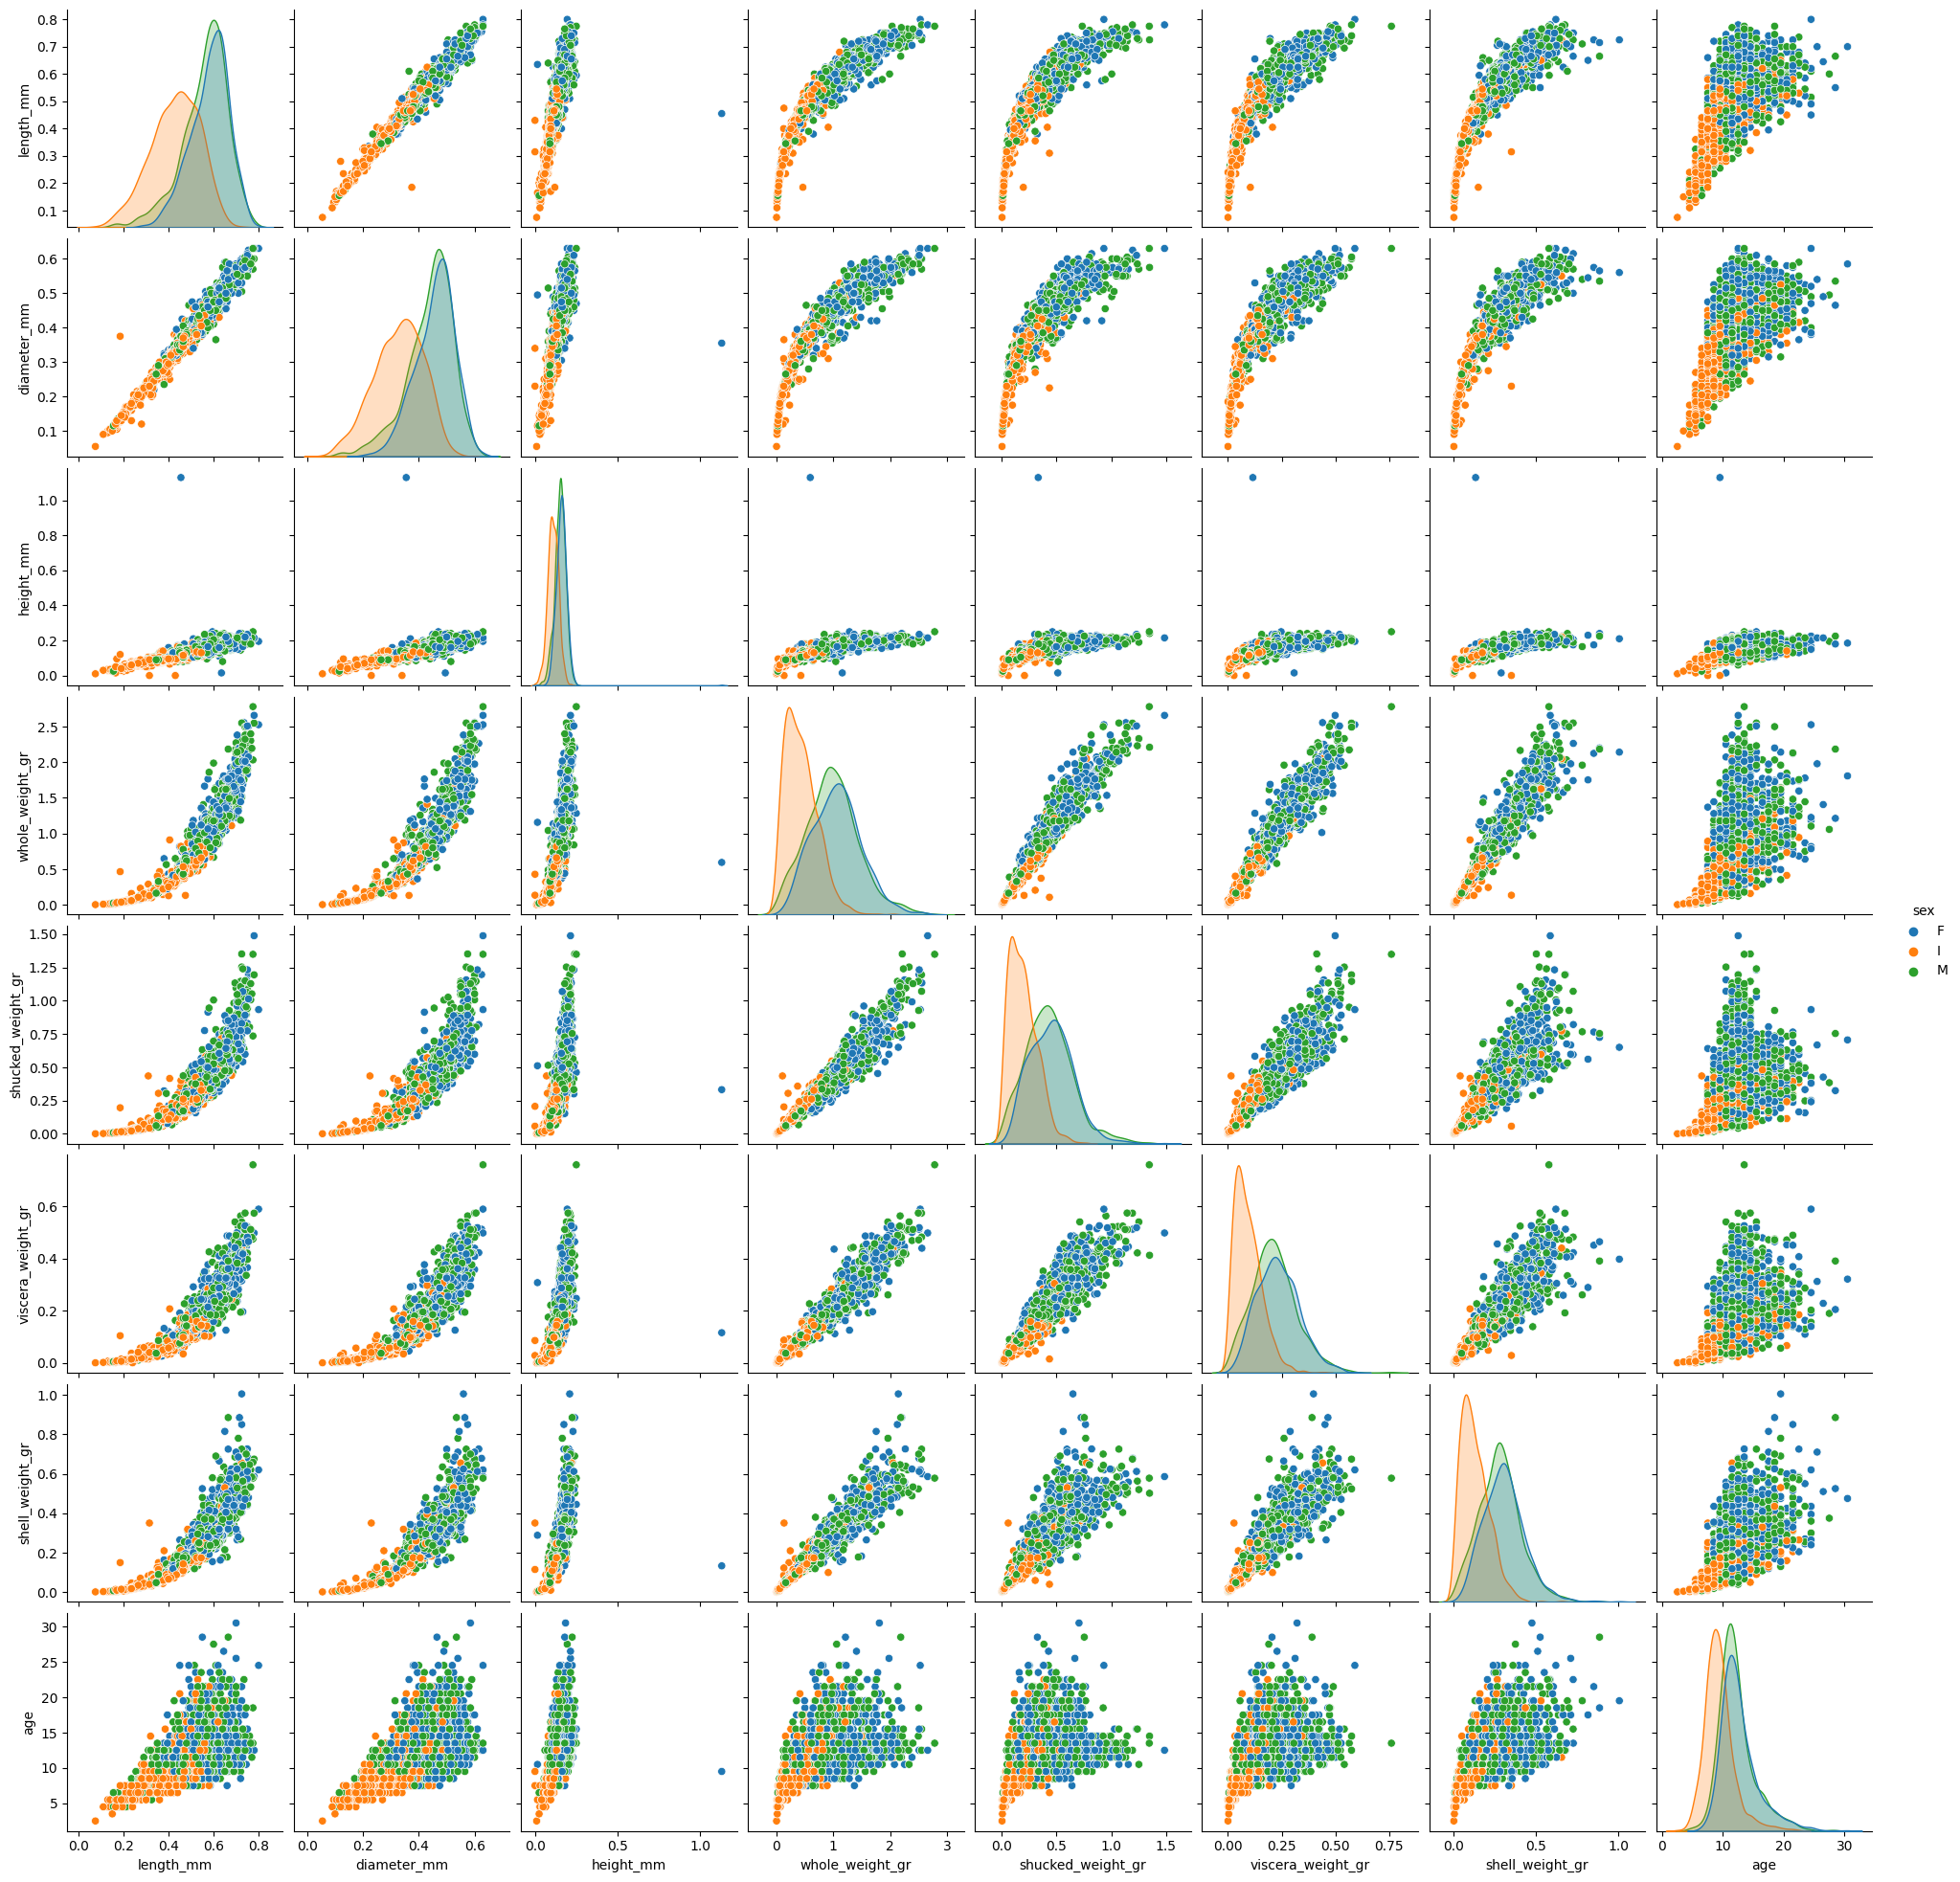

In [11]:
sns.pairplot(data=df_train, hue='sex')
plt.show()

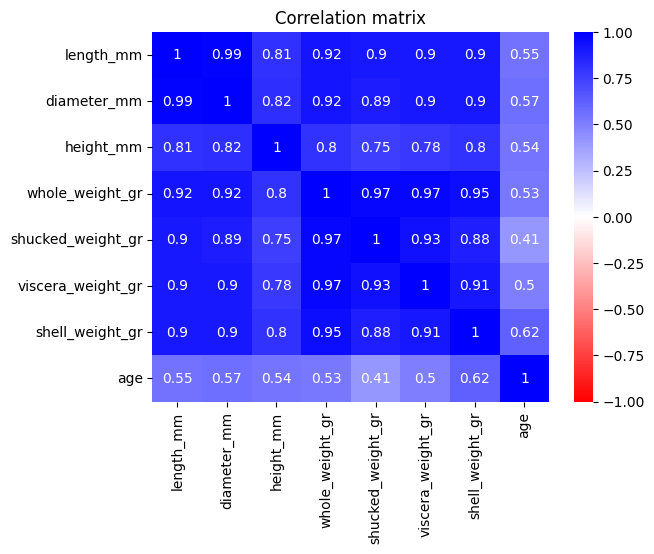

In [12]:
sns.heatmap(data=df_train.corr().round(2), annot=True, vmax=1, vmin=-1, cmap='bwr_r')
plt.title('Correlation matrix')
plt.show()

In [13]:
X_vif = X_train.drop('sex', axis=1).assign(const=1)
vif = [variance_inflation_factor(X_vif, i) for i in range(len(X_vif.columns))]
df_vif = pd.DataFrame({'name':X_vif.columns,'vif':vif,})
df_vif.style.background_gradient(cmap='Blues')

In [65]:
df_mod = df_train.copy()
df_mod['diff_length_diameter_mm'] = df_mod['length_mm'] - \
    df_mod['diameter_mm']
df_mod['diff_whole_shucked_mm'] = df_mod['whole_weight_gr'] - \
    df_mod['shucked_weight_gr']
df_mod['ratio_diameter_length'] = df_mod['diameter_mm'] / \
    df_mod['length_mm']
df_mod['diff_whole_viscera'] = df_mod['whole_weight_gr'] - \
    df_mod['viscera_weight_gr']
df_mod['diff_shucked_viscera'] = df_mod['shucked_weight_gr'] - \
    df_mod['viscera_weight_gr']
df_mod['ratio_viscera_meat'] = df_mod['viscera_weight_gr'] / \
    df_mod['shucked_weight_gr']
df_mod['ratio_diameter_shell'] = df_mod['diameter_mm'] / \
    df_mod['shell_weight_gr']
df_mod['ratio_shell_weight'] = df_mod['shell_weight_gr'] / \
    df_mod['whole_weight_gr']
query_string = '(shell_weight_gr < whole_weight_gr) & ' + \
    '(height_mm < 1) & (height_mm > 0) & (diameter_mm < length_mm)'
df_mod = df_mod.query(query_string)
df_mod = df_mod.drop(['diameter_mm','shucked_weight_gr',\
    'length_mm','diameter_mm','viscera_weight_gr'], axis=1)


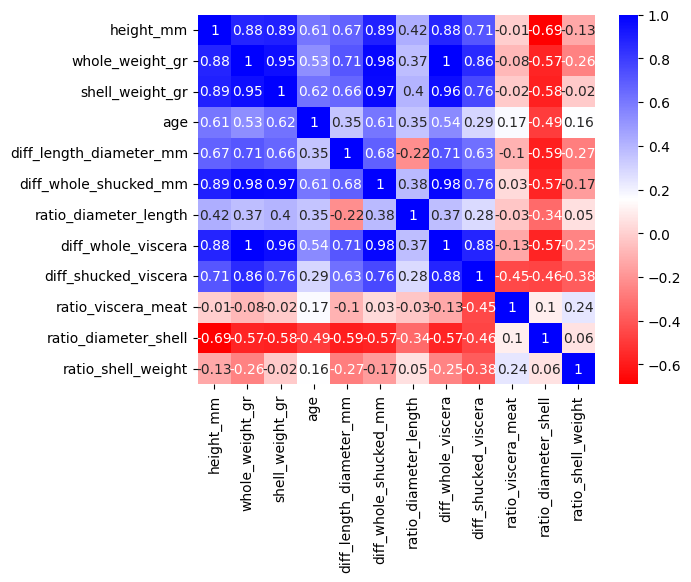

In [66]:
sns.heatmap(data=df_mod.corr().round(2),annot=True, cmap='bwr_r')
plt.show()

In [67]:
df_mod.corr()

height_mm  whole_weight_gr  shell_weight_gr  \
height_mm                 1.000000         0.884154         0.887585   
whole_weight_gr           0.884154         1.000000         0.954845   
shell_weight_gr           0.887585         0.954845         1.000000   
age                       0.605088         0.533560         0.622898   
diff_length_diameter_mm   0.668349         0.713385         0.663653   
diff_whole_shucked_mm     0.886823         0.980447         0.971592   
ratio_diameter_length     0.424372         0.367971         0.401365   
diff_whole_viscera        0.879388         0.997302         0.956689   
diff_shucked_viscera      0.712151         0.863891         0.759592   
ratio_viscera_meat       -0.013340        -0.081651        -0.018408   
ratio_diameter_shell     -0.685990        -0.566784        -0.583299   
ratio_shell_weight       -0.129366        -0.255864        -0.020325   

                              age  diff_length_diameter_mm  \
height_mm                0.605088                 0.668349   
whole_weight_gr          0.533560                 0.713385   
shell_weight_gr          0.622898                 0.663653   
age                      1.000000                 0.353045   
diff_length_diameter_mm  0.353045                 1.000000   
diff_whole_shucked_mm    0.607872                 0.684058   
ratio_diameter_length    0.354382                -0.216645   
diff_whole_viscera       0.537887                 0.706169   
diff_shucked_viscera     0.290026                 0.634342   
ratio_viscera_meat       0.174006                -0.100138   
ratio_diameter_shell    -0.489235                -0.590051   
ratio_shell_weight       0.160911                -0.268773   

                         diff_whole_shucked_mm  ratio_diameter_length  \
height_mm                             0.886823               0.424372   
whole_weight_gr                       0.980447               0.367971   
shell_weight_gr                       0.971592               0.401365   
age                                   0.607872               0.354382   
diff_length_diameter_mm               0.684058              -0.216645   
diff_whole_shucked_mm                 1.000000               0.381648   
ratio_diameter_length                 0.381648               1.000000   
diff_whole_viscera                    0.976931               0.371375   
diff_shucked_viscera                  0.758199               0.284882   
ratio_viscera_meat                    0.031660              -0.025211   
ratio_diameter_shell                 -0.568572              -0.337955   
ratio_shell_weight                   -0.165481               0.045681   

                         diff_whole_viscera  diff_shucked_viscera  \
height_mm                          0.879388              0.712151   
whole_weight_gr                    0.997302              0.863891   
shell_weight_gr                    0.956689              0.759592   
age                                0.537887              0.290026   
diff_length_diameter_mm            0.706169              0.634342   
diff_whole_shucked_mm              0.976931              0.758199   
ratio_diameter_length              0.371375              0.284882   
diff_whole_viscera                 1.000000              0.879951   
diff_shucked_viscera               0.879951              1.000000   
ratio_viscera_meat                -0.125596             -0.453895   
ratio_diameter_shell              -0.565435             -0.461560   
ratio_shell_weight                -0.245506             -0.381454   

                         ratio_viscera_meat  ratio_diameter_shell  \
height_mm                         -0.013340             -0.685990   
whole_weight_gr                   -0.081651             -0.566784   
shell_weight_gr                   -0.018408             -0.583299   
age                                0.174006             -0.489235   
diff_length_diameter_mm           -0.100138             -0.590051   
diff_whole_shucked_

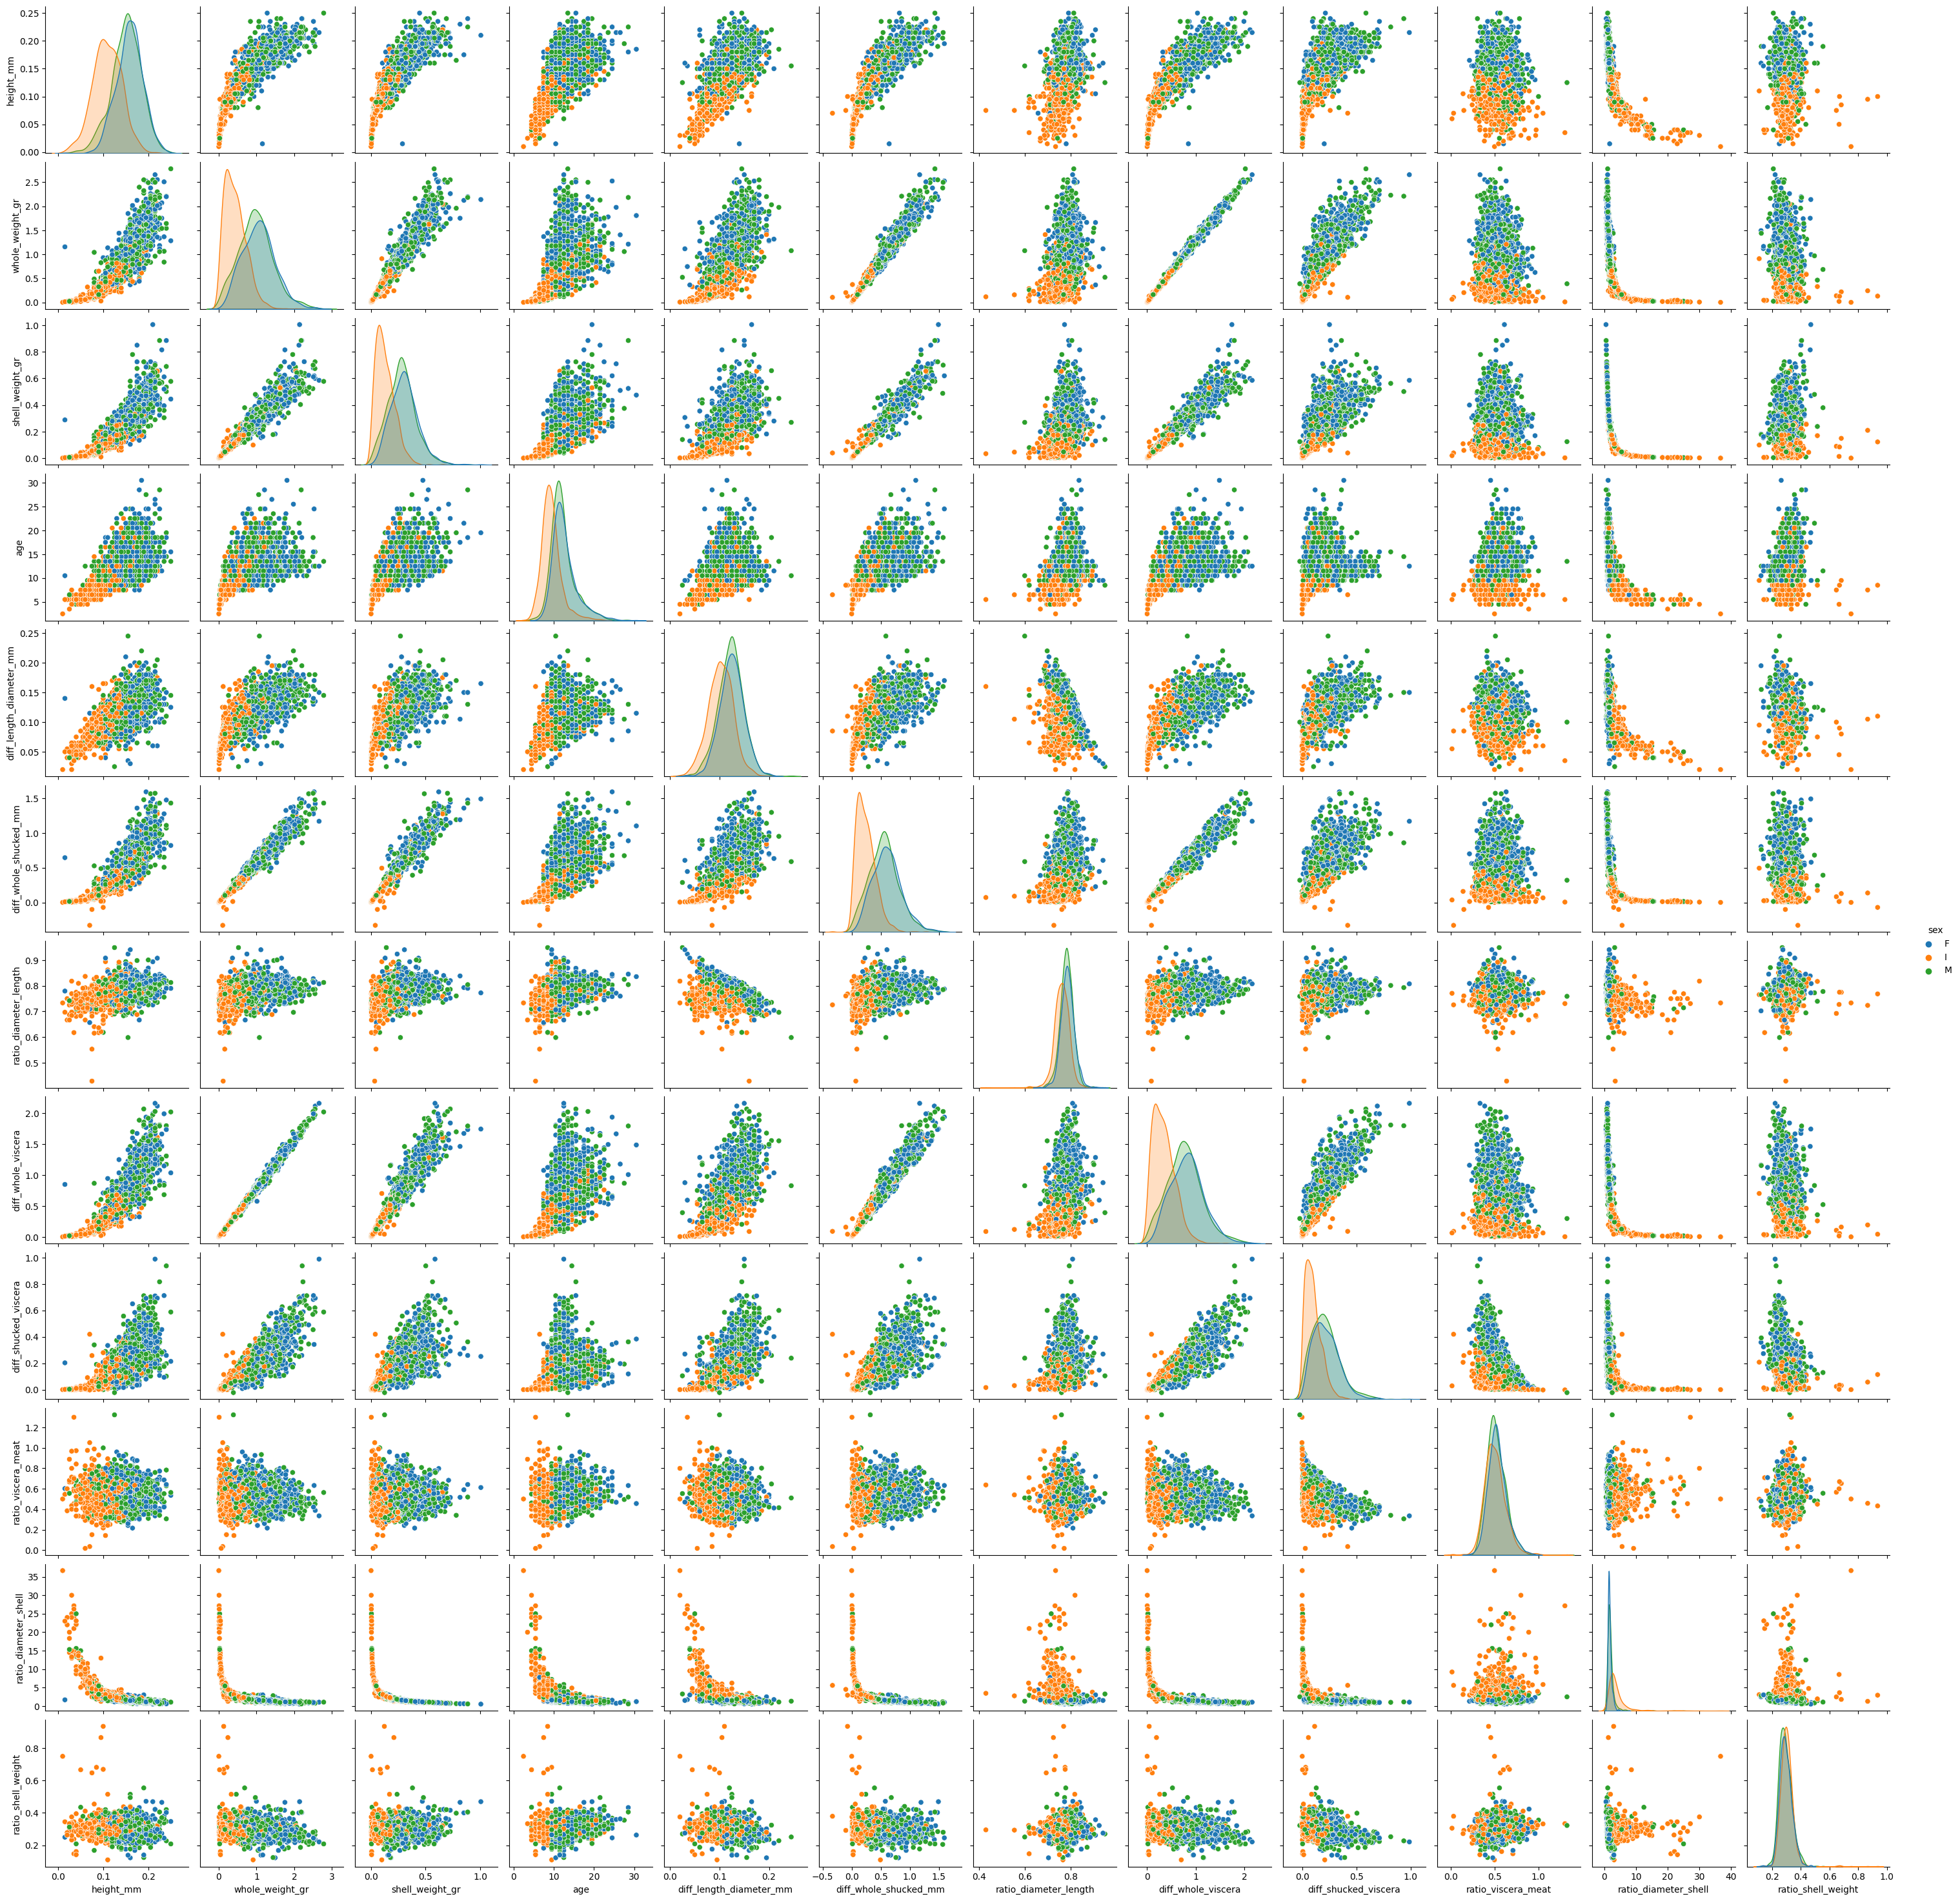

In [68]:
sns.pairplot(data=df_mod, hue='sex')

In [63]:
df_mod.sort_values(by='height_mm', ascending=False)

sex  height_mm  whole_weight_gr  shell_weight_gr   age  \
1763   M      0.250           2.7795           0.5780  13.5   
2179   F      0.250           1.2830           0.4450  15.5   
2161   F      0.240           2.1995           0.8850  18.5   
307    M      0.240           1.5415           0.5350  14.5   
1528   M      0.240           2.2100           0.5015  14.5   
...   ..        ...              ...              ...   ...   
3902   I      0.020           0.0180           0.0050   5.5   
694    I      0.020           0.0190           0.0050   5.5   
2169   I      0.015           0.0145           0.0050   5.5   
1174   F      0.015           1.1565           0.2885  10.5   
236    I      0.010           0.0020           0.0015   2.5   

      diff_length_diameter_mm  diff_whole_shucked_mm  ratio_diameter_length  \
1763                    0.145                 1.4310               0.812903   
2179                    0.125                 0.8210               0.789916   
2161                    0.150                 1.4750               0.790210   
307                     0.130                 1.0705               0.798450   
1528                    0.150                 0.8590               0.793103   
...                       ...                    ...                    ...   
3902                    0.040                 0.0105               0.750000   
694                     0.055                 0.0125               0.666667   
2169                    0.050                 0.0090               0.696970   
1174                    0.140                 0.6450               0.779528   
236                     0.020                 0.0010               0.733333   

      diff_whole_viscera  diff_shucked_viscera  ratio_viscera_meat  \
1763              2.0195                0.5885            0.563589   
2179              1.0355                0.2145            0.535714   
2161              1.7345                0.2595            0.641822   
307               1.1725                0.1020            0.783439   
1528              1.7970                0.9380            0.305699   
...                  ...                   ...                 ...   
3902              0.0135                0.0030            0.600000   
694               0.0165                0.0040            0.384615   
2169              0.0115                0.0025            0.545455   
1174              0.8485                0.2035            0.602151   
236               0.0015                0.0005            0.500000   

      ratio_diameter_shell  ratio_shell_weight  
1763              1.089965            0.207951  
2179              1.056180            0.346843  
2161              0.638418            0.402364  
307               0.962617            0.347065  
1528              1.146560            0.226923  
...                    ...                 ...  
3902             24.000000            0.277778  
694              22.000000            0.263158  
2169             23.000000            0.344828  
1174              1.715771            0.249460  
236              36.666667            0.750000  

[3129 rows x 13 columns]